In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gwbench import network
from scipy import integrate


In [2]:
%config InlineBackend.figure_format='retina' # very useful command for high-res images

# CV Bias Functions

In [3]:
def cutler_vallisneri_overlap_vec(del_hf, delta_hf, psd, freqs):
    return np.array([ inner_prod_simps(del_hf[deriv], delta_hf, psd, freqs) for deriv in del_hf ])

def inner_prod_simps_normed(h1, h2, Sn, f, h1_norm = None, h2_norm=None):
    if h1_norm is None:
        h1_norm = 4*np.real(integrate.simpson(y= h1*np.conjugate(h1) / Sn, x=f))
    if h2_norm is None:
        h2_norm = 4*np.real(integrate.simpson(y= h2*np.conjugate(h2) / Sn, x=f))
    return  2*np.real(integrate.simpson(y= (h1*np.conjugate(h2) + h2*np.conjugate(h1)) / Sn, x=f)) / (np.sqrt(h1_norm * h2_norm))

def inner_prod_simps(h1, h2, Sn, f):
    return  2*np.real(integrate.simpson(y= (h1*np.conjugate(h2) + h2*np.conjugate(h1)) / Sn, x=f))


# Test Binary

In [4]:
network_label = 'HLV+'
 
inj_params = dict()
inj_params['Mc'] = 30.9
inj_params['eta'] = 0.247
inj_params['iota'] = np.pi/4
inj_params['chi1x'] = 0
inj_params['chi1y'] = 0
inj_params['chi1z'] = 0
inj_params['chi2x'] = 0
inj_params['chi2y'] = 0
inj_params['chi2z'] = 0
inj_params['DL'] = 475
inj_params['tc'] = 0
inj_params['phic'] = 0
inj_params['ra'] = np.pi/4
inj_params['dec'] = np.pi/4
inj_params['psi'] = np.pi/4
inj_params['gmst0'] = 0
inj_params['phiRef'] = 0.
inj_params['fRef'] = 20.

d_f = 2**-4
f_low = 10.
f_high = 2048.
f = np.arange(f_low, f_high, d_f)

conv_cos = ('iota','dec')
conv_log = ('Mc','DL')
 
deriv_symbs_string = 'Mc eta DL tc phic iota ra dec psi'
deriv_variables = ['log_Mc', 'eta', 'log_DL', 'tc', 'phic', 'cos_iota', 'ra', 'cos_dec', 'psi']

arnab_opt_bias = np.array([-1.31714324e-03, -2.53070629e-03, -1.29260647e-02, 2.33387974e-04, -2.43714891e-02, -8.23804703e-03, 4.42655777e-05, -1.40069160e-05, -2.42399781e-02])

arnab_unopt_bias = np.array([1.30937195e-02, 3.38632109e-02, 1.74124245e+00, -2.14910145e-03, 3.90542706e-01, 2.64436484e-01, -1.87088785e-03, 8.53396225e-04, -6.38689364e-02])

arnab_errs = {'log_Mc': 0.0017209783535026193,
 'eta': 0.0019934682896438896,
 'log_DL': 0.27785942459059854,
 'tc': 0.0001101277643364176,
 'phic': 1.245803283940172,
 'cos_iota': 0.29379454181893927,
 'ra': 0.006669704015590906,
 'cos_dec': 0.004860315993658646,
 'psi': 0.6557368909206751}

## Compute True and Approximate Responses

In [5]:
net_ap = network.Network(network_spec=network_label)

approximant = 'IMRPhenomD'
wf_model_name = 'lal_bbh'
# pass the chosen waveform to the network for initialization
net_ap.set_wf_vars(wf_model_name=wf_model_name, wf_other_var_dic = {'approximant': approximant})


use_rot = 0

net_ap.set_net_vars(
    f=f, inj_params=inj_params,
    deriv_symbs_string=deriv_symbs_string,
    conv_cos=conv_cos, conv_log=conv_log,
    use_rot=use_rot
    )
net_ap.calc_wf_polarizations()
net_ap.calc_wf_polarizations_derivs_num(step=1e-5, method='central', order=2, n=1)
net_ap.setup_ant_pat_lpf_psds()
net_ap.calc_det_responses()
net_ap.calc_det_responses_derivs_num(step=1e-5, method='central', order=2, n=1)
net_ap.calc_snrs()
net_ap.calc_errors()


net_tr = network.Network(network_spec=network_label)

approximant = 'IMRPhenomXAS'
wf_model_name = 'lal_bbh'
# pass the chosen waveform to the network for initialization
net_tr.set_wf_vars(wf_model_name=wf_model_name, wf_other_var_dic = {'approximant': approximant})

net_tr.set_net_vars(
    f=f, inj_params=inj_params,
    deriv_symbs_string=deriv_symbs_string,
    conv_cos=conv_cos, conv_log=conv_log,
    use_rot=use_rot
    )
net_tr.calc_wf_polarizations()
net_tr.setup_ant_pat_lpf_psds()
net_tr.calc_det_responses()
net_tr.calc_snrs()

2023-12-31 12:01:32,690 - Network - INFO : Polarizations calculated.
2023-12-31 12:01:32,691 - Network - INFO : Calculate numeric derivatives of polarizations.
2023-12-31 12:01:32,696 - Network - INFO : Polarizations calculated.
2023-12-31 12:01:36,805 - Network - INFO : Numeric derivatives of polarizations calculated.
2023-12-31 12:01:36,831 - Network - INFO : PSDs loaded.
2023-12-31 12:01:36,835 - Network - INFO : Antenna patterns and LPFs loaded.
2023-12-31 12:01:36,846 - Network - INFO : Detector responses calculated.
2023-12-31 12:01:36,847 - Network - INFO : Calculate numeric derivatives of detector responses.
2023-12-31 12:01:36,848 - Network - INFO :    A+_H
2023-12-31 12:01:39,922 - Network - INFO :    A+_L
2023-12-31 12:01:42,967 - Network - INFO :    V+_V
2023-12-31 12:01:46,026 - Network - INFO : Numeric derivatives of detector responses calculated.
2023-12-31 12:01:46,031 - Network - INFO : SNRs calculated.
2023-12-31 12:01:46,032 - Network - INFO : Calculate errors (Fishe

In [7]:
print(net_ap.errs)


# My errs:
# {'log_Mc': 0.0017209775, 'eta': 0.001993467, 'log_DL': 0.277842, 'tc': 0.000110126006, 'phic': 1.2589339, 'cos_iota': 0.2937757, 'ra': 0.0066693784, 'cos_dec': 0.004860321, 'psi': 0.65569746}

print()

# Compare Errors:
print("Percent difference in Errors:")
for var in deriv_variables:
    print(f"{var}: {100*(arnab_errs[var] - net_ap.errs[var]) / arnab_errs[var]:.2e}%")



# My computation:
#     Percent difference in Errors:
#     log_Mc: 5.07e-05%
#     eta: 5.97e-05%
#     log_DL: 6.28e-03%
#     tc: 1.60e-03%
#     phic: -1.05e+00%
#     cos_iota: 6.41e-03%
#     ra: 4.88e-03%
#     cos_dec: -1.04e-04%
#     psi: 6.01e-03%


{'log_Mc': 0.0017209775, 'eta': 0.001993467, 'log_DL': 0.277842, 'tc': 0.000110126006, 'phic': 1.2589339, 'cos_iota': 0.2937757, 'ra': 0.0066693784, 'cos_dec': 0.004860321, 'psi': 0.65569746}

Percent difference in Errors:
log_Mc: 5.07e-05%
eta: 5.97e-05%
log_DL: 6.28e-03%
tc: 1.60e-03%
phic: -1.05e+00%
cos_iota: 6.41e-03%
ra: 4.88e-03%
cos_dec: -1.04e-04%
psi: 6.01e-03%


# Bias without Aligning Waveforms

In [8]:
overlap_vecs_network = np.zeros((len(net_ap.detectors), len(net_ap.deriv_variables)))

for d in range(len(net_ap.detectors)):
    ## set up initial waveforms
    h1 = net_tr.detectors[d].hf
    h2 = net_ap.detectors[d].hf
    f = net_ap.detectors[d].f
    Sn = net_ap.detectors[d].psd
    network_spec_d = [net_ap.detectors[d].det_key]

    ## Compute CV overlap vector for this detector
    delta_hf = net_tr.detectors[d].hf - net_ap.detectors[d].hf
    overlap_vecs_network[d] = cutler_vallisneri_overlap_vec(net_ap.detectors[d].del_hf, delta_hf, net_ap.detectors[d].psd, net_ap.detectors[d].f)


cv_bias = np.matmul(net_ap.cov, np.sum(overlap_vecs_network, axis=0))
cv_bias = np.array(cv_bias.tolist()[0])

In [9]:
for i, param in enumerate(deriv_variables):
    print(f"{param}: {cv_bias[i]:.3f} ")


# My Computation of CV Biases:

# log_Mc: 0.012 
# eta: 0.032 
# log_DL: 1.739 
# tc: -0.002 
# phic: 0.610 
# cos_iota: 0.277 
# ra: -0.002 
# cos_dec: 0.001 
# psi: -0.153 


log_Mc: 0.012 
eta: 0.032 
log_DL: 1.739 
tc: -0.002 
phic: 0.610 
cos_iota: 0.277 
ra: -0.002 
cos_dec: 0.001 
psi: -0.153 


log_Mc: 8.914%
eta: 4.219%
log_DL: 0.119%
tc: -12.059%
phic: 56.165%
cos_iota: 4.732%
ra: -15.826%
cos_dec: 8.796%
psi: -139.416%


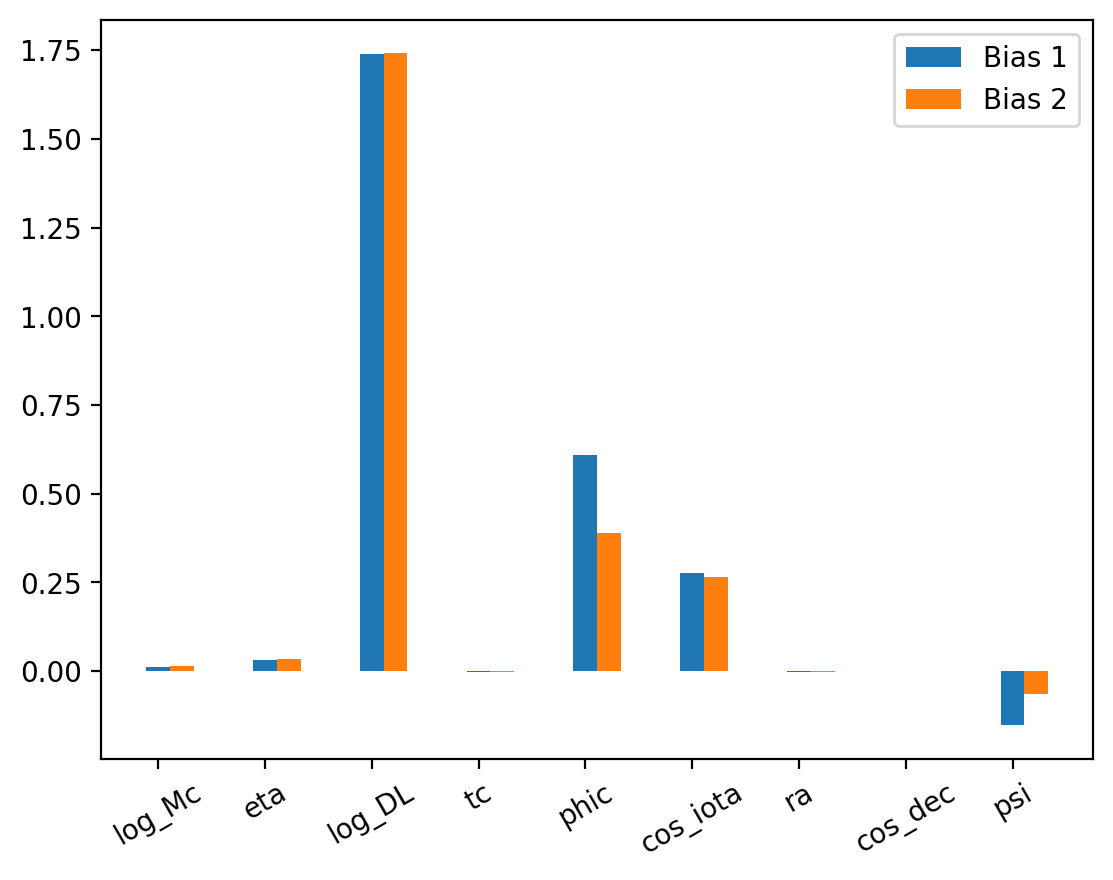

In [10]:
for n, bias_diff in enumerate(100*np.abs(arnab_unopt_bias-cv_bias)/arnab_unopt_bias):
    print(f"{deriv_variables[n]}: {bias_diff:.3f}%")

bias1 = cv_bias
bias2 = arnab_unopt_bias

x = np.linspace(0, len(bias1), len(bias1))

width = 0.25
plt.bar(x, bias1, width=width, label='Bias 1')
plt.bar(x+width, bias2, width=width, label='Bias 2')

plt.xticks(x, deriv_variables, rotation=30)

plt.legend()
plt.show()

# My Result for differences in Bias:
# log_Mc: 8.914%
# eta: 4.219%
# log_DL: 0.119%
# tc: -12.059%
# phic: 56.165%
# cos_iota: 4.732%
# ra: -15.826%
# cos_dec: 8.796%
# psi: -139.416%

# Bias after Optimizing $t_c$, $\phi_c$.

## Using Arnab's Phase and Time shifts

In [11]:
# Detector Network: [A+_H, A+_L, V+_V]
arnab_time_shifts = [0.004638742656595712, 0.004638742656595712, 0.004638742656595712]
arnab_phase_shifts = [-1.767621466142875, -1.767621466142875, -1.7708474550824258]

In [12]:
overlap_vecs_network = np.zeros((len(net_ap.detectors), len(net_ap.deriv_variables)))

# separate_det_opt = False
for d in range(len(net_ap.detectors)):

    ## set up initial waveforms
    h1 = net_tr.detectors[d].hf
    h2 = net_ap.detectors[d].hf
    f = net_ap.detectors[d].f
    Sn = net_ap.detectors[d].psd
    network_spec_d = [net_ap.detectors[d].det_key]

    inj_params_opt_det = inj_params.copy()
    inj_params_opt_det['tc'] = arnab_time_shifts[d]
    inj_params_opt_det['phic'] = arnab_phase_shifts[d]

    net_tr_opt_d = network.Network(network_spec=network_spec_d)
    net_tr_opt_d.set_wf_vars(wf_model_name='lal_bbh', wf_other_var_dic = {'approximant': 'IMRPhenomXAS'})
    net_tr_opt_d.set_net_vars(
        f=f, inj_params=inj_params_opt_det,
        deriv_symbs_string=deriv_symbs_string,
        conv_cos=conv_cos, conv_log=conv_log,
        use_rot=use_rot
        )
    net_tr_opt_d.calc_wf_polarizations()
    net_tr_opt_d.setup_ant_pat_lpf_psds()
    net_tr_opt_d.calc_det_responses()
    net_tr_opt_d.calc_wf_polarizations()

    ## Sanity Checks to make sure the correct phase and time shifts are being applied
    print()
    print(network_spec_d)
    print("time shift:", arnab_time_shifts[d])
    print("phase shift:", arnab_phase_shifts[d])

    print("Inner product:")
    print(inner_prod_simps_normed(net_ap.detectors[d].hf, net_tr_opt_d.detectors[0].hf, net_ap.detectors[d].psd, net_ap.detectors[d].f))

    ## Compute CV overlap vector for this detector
    delta_hf = net_tr_opt_d.detectors[0].hf - net_ap.detectors[d].hf
    overlap_vecs_network[d] = cutler_vallisneri_overlap_vec(net_ap.detectors[d].del_hf, delta_hf, net_ap.detectors[d].psd, net_ap.detectors[d].f)

cv_bias_opt = np.matmul(net_ap.cov, np.sum(overlap_vecs_network, axis=0))
cv_bias_opt = np.array(cv_bias_opt.tolist()[0])

2023-12-31 12:03:01,918 - Network - INFO : Polarizations calculated.
2023-12-31 12:03:01,925 - Network - INFO : PSDs loaded.
2023-12-31 12:03:01,927 - Network - INFO : Antenna patterns and LPFs loaded.
2023-12-31 12:03:01,935 - Network - INFO : Detector responses calculated.
2023-12-31 12:03:01,940 - Network - INFO : Polarizations calculated.
2023-12-31 12:03:01,962 - Network - INFO : Polarizations calculated.
2023-12-31 12:03:01,970 - Network - INFO : PSDs loaded.
2023-12-31 12:03:01,972 - Network - INFO : Antenna patterns and LPFs loaded.
2023-12-31 12:03:01,978 - Network - INFO : Detector responses calculated.
2023-12-31 12:03:01,984 - Network - INFO : Polarizations calculated.
2023-12-31 12:03:02,011 - Network - INFO : Polarizations calculated.
2023-12-31 12:03:02,033 - Network - INFO : PSDs loaded.
2023-12-31 12:03:02,042 - Network - INFO : Antenna patterns and LPFs loaded.
2023-12-31 12:03:02,048 - Network - INFO : Detector responses calculated.
2023-12-31 12:03:02,054 - Network 


['A+_H']
time shift: 0.004638742656595712
phase shift: -1.767621466142875
Inner product:
0.9553555581352702

['A+_L']
time shift: 0.004638742656595712
phase shift: -1.767621466142875
Inner product:
0.9553555581352701

['V+_V']
time shift: 0.004638742656595712
phase shift: -1.7708474550824258
Inner product:
0.9556221122701457


In [ ]:
# My Result for t_0, phi_0, and inner product:

# ['A+_H']
# time shift: 0.004638742656595712
# phase shift: -1.767621466142875
# Inner product:
# 0.9553555581352702

# ['A+_L']
# time shift: 0.004638742656595712
# phase shift: -1.767621466142875
# Inner product:
# 0.9553555581352701

# ['V+_V']
# time shift: 0.004638742656595712
# phase shift: -1.7708474550824258
# Inner product:
# 0.9556221122701457

In [14]:
for i, param in enumerate(deriv_variables):
    print(f"{param}: {cv_bias_opt[i]:.3f} ")

# My Result for CV Biases:
# log_Mc: -0.001 
# eta: -0.002 
# log_DL: 0.031 
# tc: 0.000 
# phic: 0.228 
# cos_iota: -0.009 
# ra: 0.000 
# cos_dec: -0.000 
# psi: -0.026 

log_Mc: -0.001 
eta: -0.002 
log_DL: 0.031 
tc: 0.000 
phic: 0.228 
cos_iota: -0.009 
ra: 0.000 
cos_dec: -0.000 
psi: -0.026 


log_Mc: -51.673%
eta: -32.257%
log_DL: -339.960%
tc: 15.079%
phic: -1025.700%
cos_iota: -14.688%
ra: 43.932%
cos_dec: -22.604%
psi: -7.555%


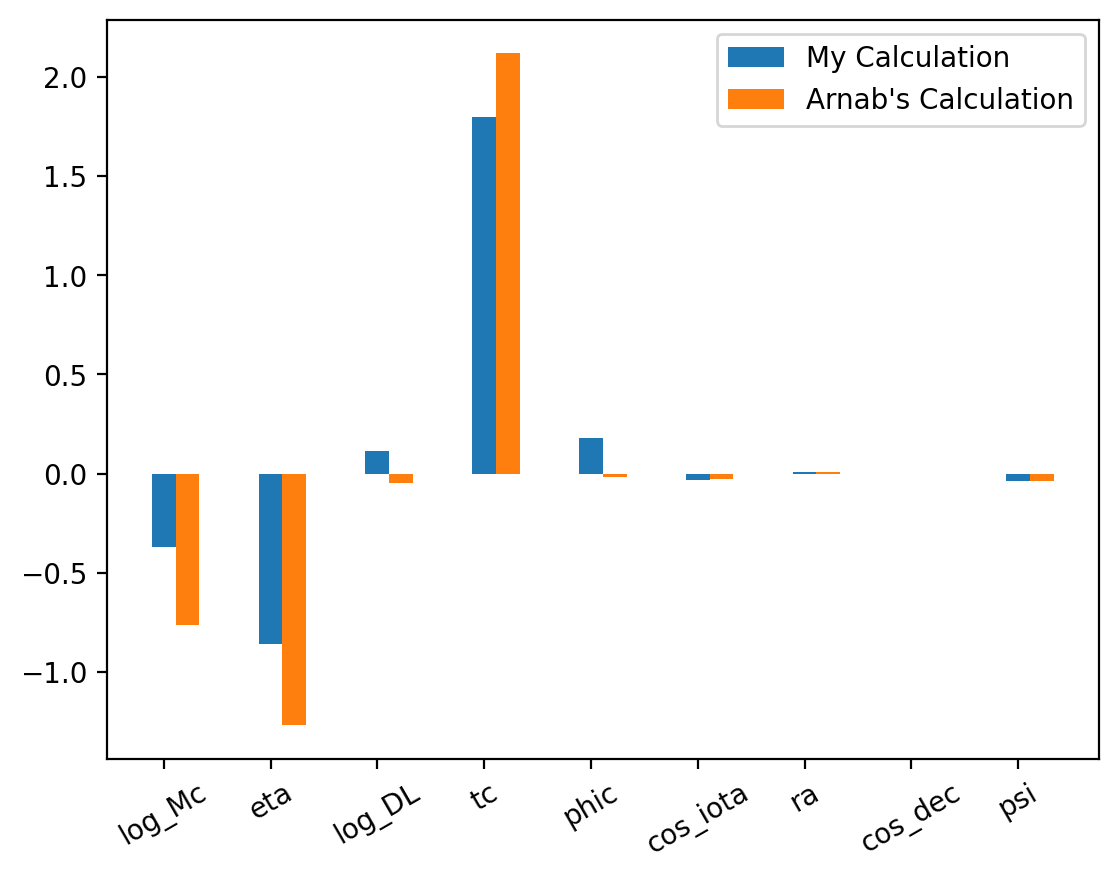

In [15]:
cv_bias_sigma = np.zeros(len(cv_bias_opt))
arnab_bias_sigma = np.zeros(len(cv_bias_opt))

for i, var in enumerate(deriv_variables):
    cv_bias_sigma[i] = cv_bias_opt[i]/net_ap.errs[var]
    arnab_bias_sigma[i] = arnab_opt_bias[i]/arnab_errs[var]

for n, bias in enumerate(100*np.abs(arnab_bias_sigma-cv_bias_sigma)/arnab_bias_sigma):
    print(f"{deriv_variables[n]}: {bias:.3f}%")

bias1 = cv_bias_sigma
bias2 = arnab_bias_sigma


x = np.linspace(0, len(bias1), len(bias1))

width = 0.25
plt.bar(x, bias1, width=width, label='My Calculation')
plt.bar(x+width, bias2, width=width, label="Arnab's Calculation")

plt.xticks(x, deriv_variables, rotation=30)

plt.legend()
plt.show()

# My Results for difference in Bias/Sigma:

# log_Mc: -51.673%
# eta: -32.257%
# log_DL: -339.960%
# tc: 15.079%
# phic: -1025.700%
# cos_iota: -14.688%
# ra: 43.932%
# cos_dec: -22.604%
# psi: -7.555%


# By Optimizing Matched Filter

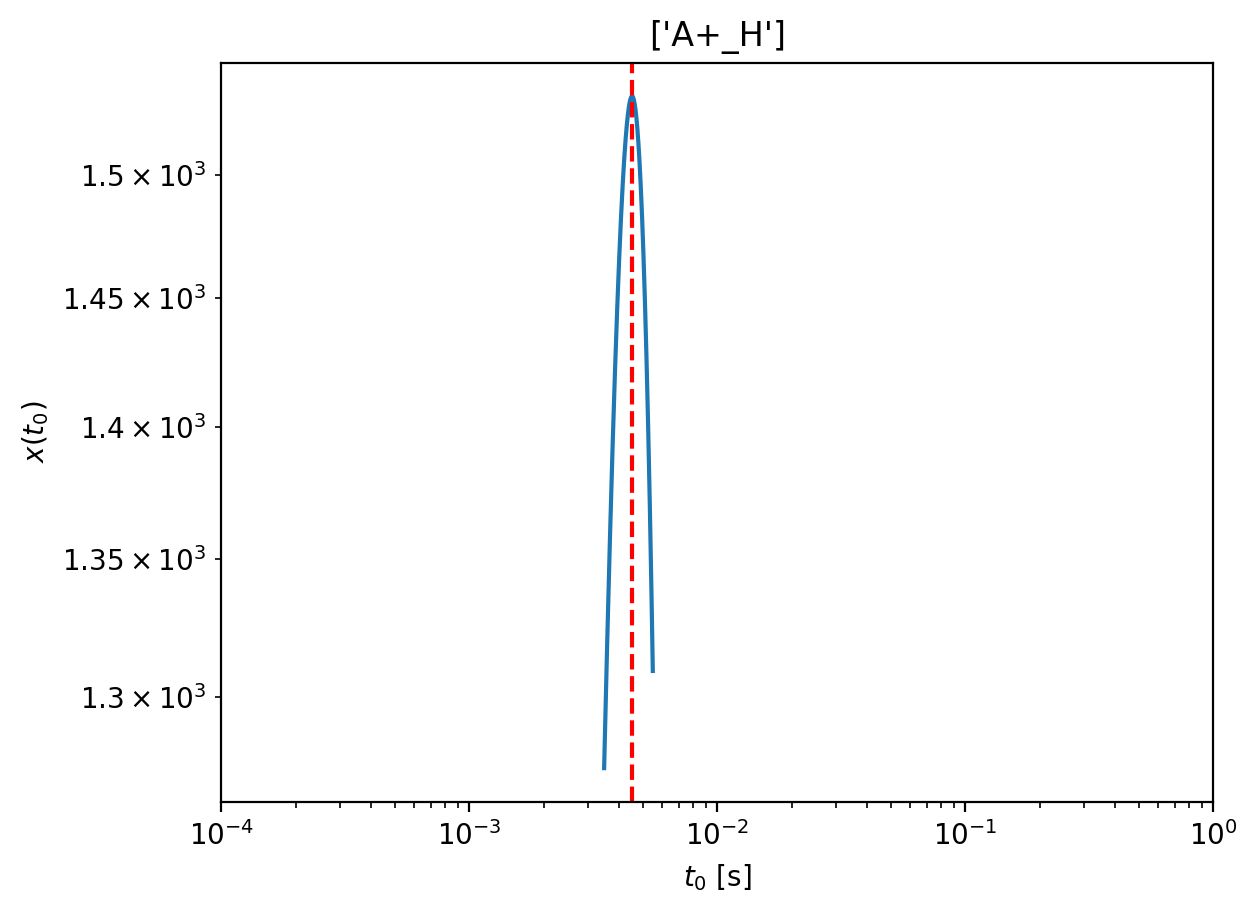

2023-12-31 12:05:11,019 - Network - INFO : Polarizations calculated.
2023-12-31 12:05:11,027 - Network - INFO : PSDs loaded.
2023-12-31 12:05:11,029 - Network - INFO : Antenna patterns and LPFs loaded.
2023-12-31 12:05:11,035 - Network - INFO : Detector responses calculated.
2023-12-31 12:05:11,039 - Network - INFO : Polarizations calculated.



['A+_H']
time shift: 0.004638742656595712
phase shift: -1.767621466142875
Inner product:
0.9993902513373188


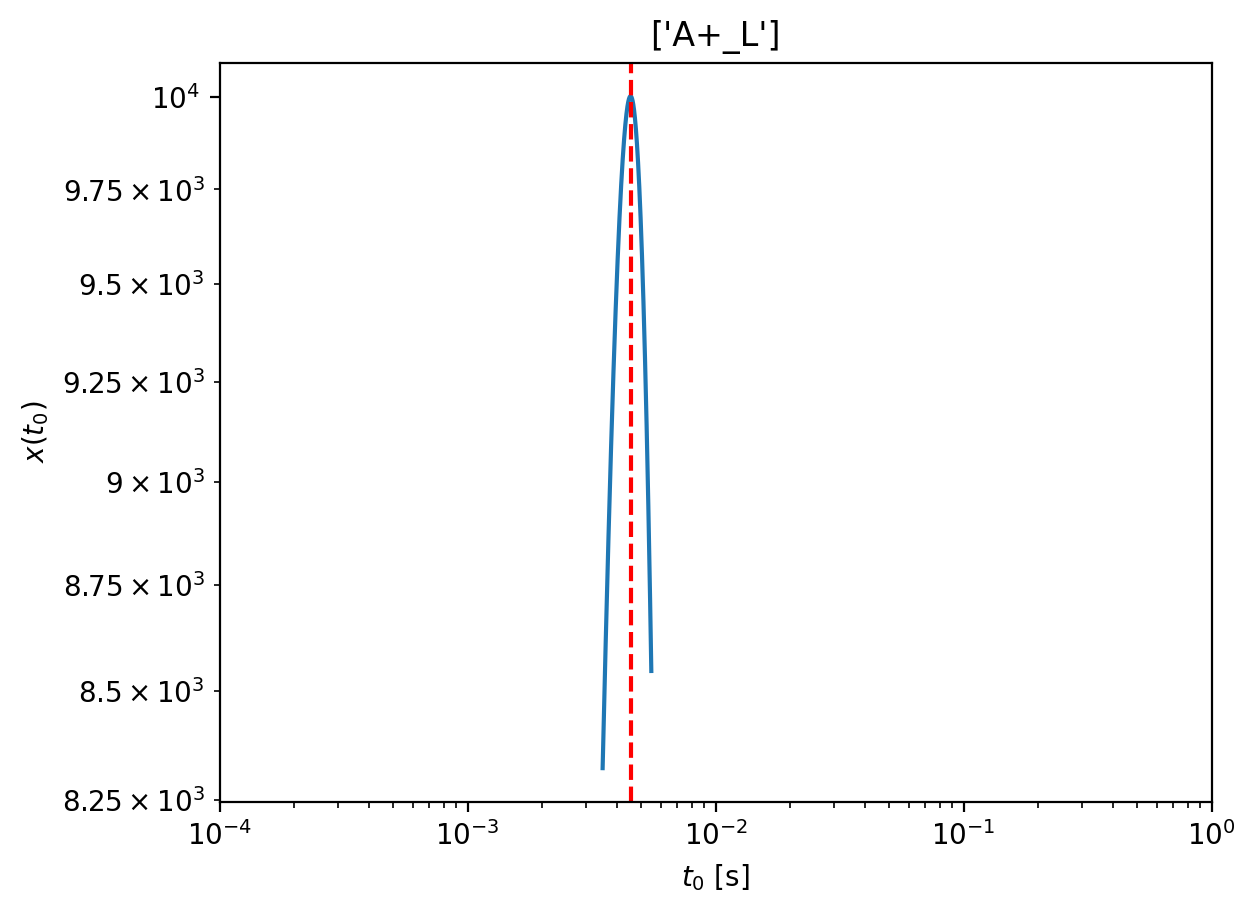

2023-12-31 12:05:21,280 - Network - INFO : Polarizations calculated.
2023-12-31 12:05:21,287 - Network - INFO : PSDs loaded.
2023-12-31 12:05:21,289 - Network - INFO : Antenna patterns and LPFs loaded.
2023-12-31 12:05:21,295 - Network - INFO : Detector responses calculated.
2023-12-31 12:05:21,300 - Network - INFO : Polarizations calculated.



['A+_L']
time shift: 0.004638742656595712
phase shift: -1.767621466142875
Inner product:
0.9993902513373187


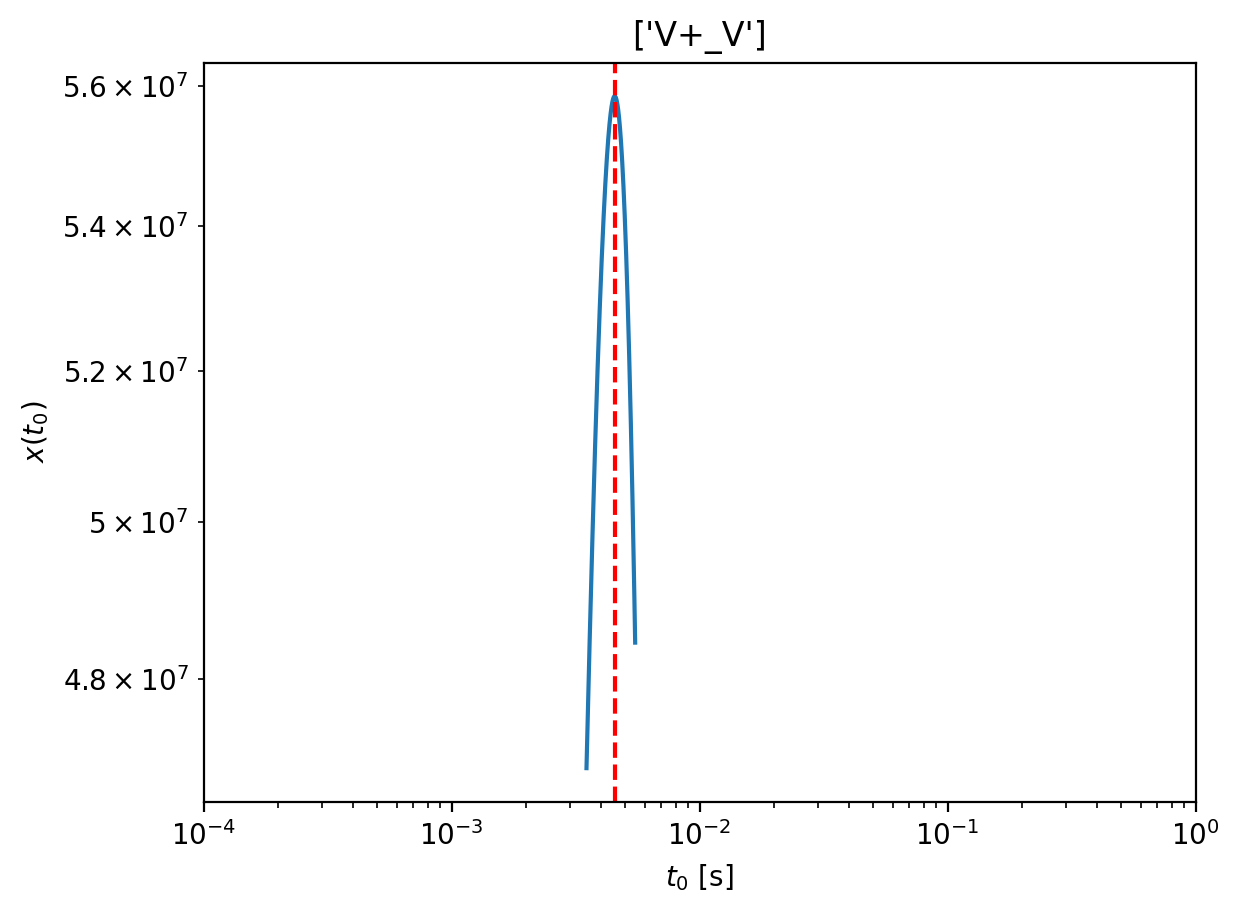

2023-12-31 12:05:31,515 - Network - INFO : Polarizations calculated.
2023-12-31 12:05:31,528 - Network - INFO : PSDs loaded.
2023-12-31 12:05:31,530 - Network - INFO : Antenna patterns and LPFs loaded.
2023-12-31 12:05:31,535 - Network - INFO : Detector responses calculated.
2023-12-31 12:05:31,540 - Network - INFO : Polarizations calculated.



['V+_V']
time shift: 0.004638742656595712
phase shift: -1.7708474550824258
Inner product:
0.9994262608333546


In [16]:
overlap_vecs_network = np.zeros((len(net_ap.detectors), len(net_ap.deriv_variables)))

# Limit the time window to precisely search for t_0
time_arr_d = np.linspace(0.0035, 0.0055, 5001)


for d in range(len(net_ap.detectors)):

    ## set up initial waveforms
    h1 = net_tr.detectors[d].hf
    h2 = net_ap.detectors[d].hf
    f = net_ap.detectors[d].f
    Sn = net_ap.detectors[d].psd
    network_spec_d = [net_ap.detectors[d].det_key]

    x_t0_re_d = np.zeros(len(time_arr_d))
    x_t0_im_d = np.zeros(len(time_arr_d))

    for i in range(len(time_arr_d)):
        t0 = time_arr_d[i]
        x_t0_d = 4*(integrate.simpson(h1 * np.conjugate(h2) * np.exp(2*np.pi*1j*f*t0)/ Sn, x=f))
        x_t0_re_d[i] = np.real(x_t0_d)
        x_t0_im_d[i] = np.imag(x_t0_d)

    max_idx = np.argmax(x_t0_re_d**2 + x_t0_im_d**2)
    time_shift_d = time_arr_d[max_idx]
    phase_shift_d = np.unwrap(np.angle(x_t0_re_d + 1j*x_t0_im_d))[max_idx]

    plt.title(network_spec_d)
    plt.plot(time_arr_d, x_t0_re_d**2 + x_t0_im_d**2)
    plt.axvline(x=time_shift_d, ls='--', c='r')
    plt.xlabel('$t_0$ [s]')
    plt.ylabel("$x(t_0)$")
    plt.loglog()
    plt.xlim(1e-4, 1e0)
    plt.show()

    inj_params_opt_d = inj_params.copy()
    inj_params_opt_d['tc'] = time_shift_d
    inj_params_opt_d['phic'] = phase_shift_d 

    net_tr_opt_d = network.Network(network_spec=network_spec_d)
    net_tr_opt_d.set_wf_vars(wf_model_name='lal_bbh', wf_other_var_dic = {'approximant': 'IMRPhenomXAS'})
    net_tr_opt_d.set_net_vars(
        f=f, inj_params=inj_params_opt_d,
        deriv_symbs_string=deriv_symbs_string,
        conv_cos=conv_cos, conv_log=conv_log,
        use_rot=use_rot
        )
    net_tr_opt_d.calc_wf_polarizations()
    net_tr_opt_d.setup_ant_pat_lpf_psds()
    net_tr_opt_d.calc_det_responses()
    net_tr_opt_d.calc_wf_polarizations()

     ## Sanity Checks to make sure the correct phase and time shifts are being applied
    print()
    print(network_spec_d)
    print("time shift:", arnab_time_shifts[d])
    print("phase shift:", arnab_phase_shifts[d])

    print("Inner product:")
    print(inner_prod_simps_normed(net_ap.detectors[d].hf, net_tr_opt_d.detectors[0].hf, net_ap.detectors[d].psd, net_ap.detectors[d].f))

    ## Compute CV overlap vector for this detector
    delta_hf = net_tr_opt_d.detectors[0].hf - net_ap.detectors[d].hf
    overlap_vecs_network[d] = cutler_vallisneri_overlap_vec(net_ap.detectors[d].del_hf, delta_hf, net_ap.detectors[d].psd, net_ap.detectors[d].f)

cv_bias_opt = np.matmul(net_ap.cov, np.sum(overlap_vecs_network, axis=0))
cv_bias_opt = np.array(cv_bias_opt.tolist()[0])

In [ ]:
# My Result for t_0, phi_0, inner product:

# ['A+_H']
# time shift: 0.004638742656595712
# phase shift: -1.767621466142875
# Inner product:
# 0.9993902513373188

# ['A+_L']
# time shift: 0.004638742656595712
# phase shift: -1.767621466142875
# Inner product:
# 0.9993902513373187

# ['V+_V']
# time shift: 0.004638742656595712
# phase shift: -1.7708474550824258
# Inner product:
# 0.9994262608333546

In [19]:
for i, param in enumerate(deriv_variables):
    print(f"{param}: {cv_bias_opt[i]:.5f} ")

# My Result for CV Biases:
# log_Mc: -0.00116 
# eta: -0.00234 
# log_DL: 0.00081 
# tc: 0.00013 
# phic: 0.01051 
# cos_iota: 0.00685 
# ra: -0.00012 
# cos_dec: 0.00002 
# psi: 0.01381 

log_Mc: -0.00116 
eta: -0.00234 
log_DL: 0.00081 
tc: 0.00013 
phic: 0.01051 
cos_iota: 0.00685 
ra: -0.00012 
cos_dec: 0.00002 
psi: 0.01381 


log_Mc: -12.109%
eta: -7.629%
log_DL: -106.273%
tc: 42.738%
phic: -142.664%
cos_iota: -183.156%
ra: 368.440%
cos_dec: -213.855%
psi: -156.993%


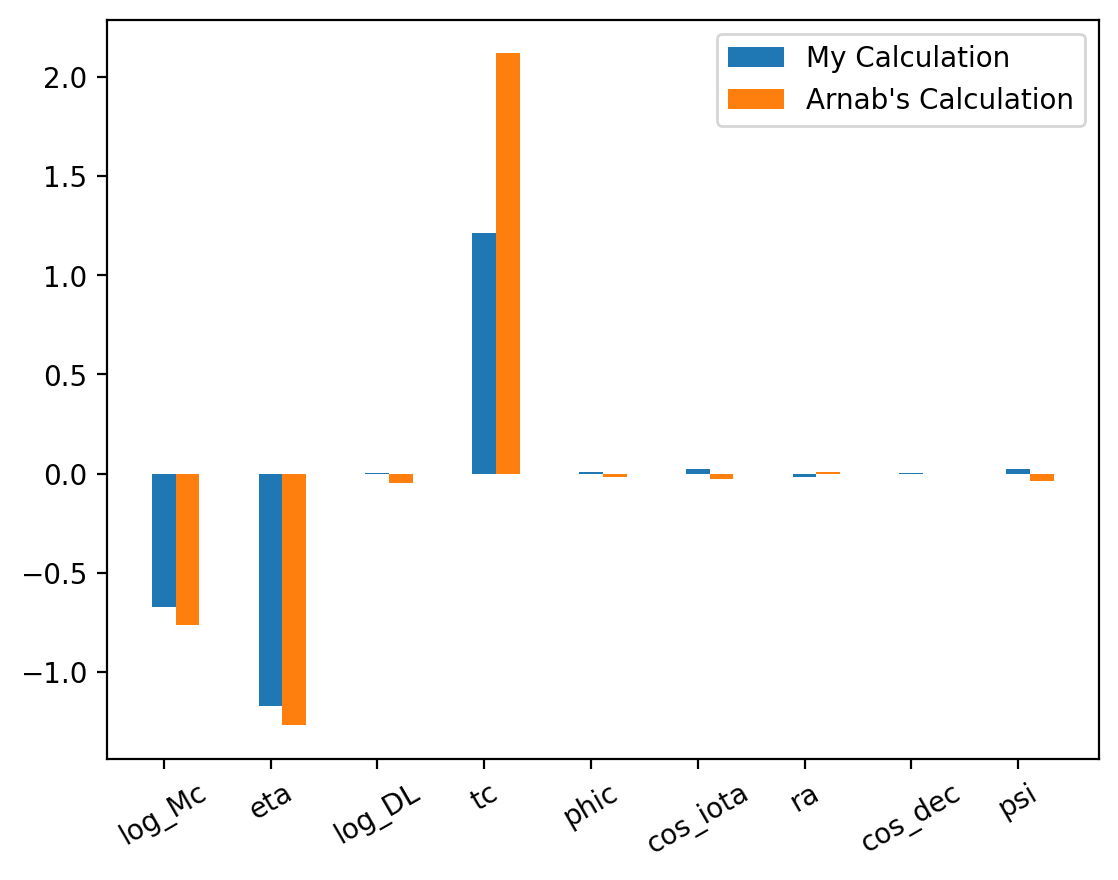

In [20]:
cv_bias_sigma = np.zeros(len(cv_bias_opt))
arnab_bias_sigma = np.zeros(len(cv_bias_opt))

for i, var in enumerate(deriv_variables):
    cv_bias_sigma[i] = cv_bias_opt[i]/net_ap.errs[var]
    arnab_bias_sigma[i] = arnab_opt_bias[i]/arnab_errs[var]

for n, bias in enumerate(100*np.abs(arnab_bias_sigma-cv_bias_sigma)/arnab_bias_sigma):
    print(f"{deriv_variables[n]}: {bias:.3f}%")

bias1 = cv_bias_sigma
bias2 = arnab_bias_sigma


x = np.linspace(0, len(bias1), len(bias1))

width = 0.25
plt.bar(x, bias1, width=width, label='My Calculation')
plt.bar(x+width, bias2, width=width, label="Arnab's Calculation")

plt.xticks(x, deriv_variables, rotation=30)

plt.legend()
plt.show()


# My Result for Difference in Bias/Sigma:

# log_Mc: -12.109%
# eta: -7.629%
# log_DL: -106.273%
# tc: 42.738%
# phic: -142.664%
# cos_iota: -183.156%
# ra: 368.440%
# cos_dec: -213.855%
# psi: -156.993%